<a href="https://colab.research.google.com/github/kodeklaude/kodeklaude.github.io/blob/master/Financial_Inclusion_in_Africa_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
import numpy as np
import pylab
import pandas as pd

In [37]:
from google.colab import drive
drive.mount('/content/gdrive')

test = pd.read_csv('/content/gdrive/My Drive/Financial Inclusion in Africa/data/Test_v2.csv')
train = pd.read_csv('/content/gdrive/My Drive/Financial Inclusion in Africa/data/Train_v2.csv')
submission = pd.read_csv('/content/gdrive/My Drive/Financial Inclusion in Africa/data/SubmissionFile.csv')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
train_ID = train['uniqueid']
test_ID = test['uniqueid']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("uniqueid", axis = 1, inplace = True)
test.drop("uniqueid", axis = 1, inplace = True)

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
train["bank_account"] = le.fit_transform(train["bank_account"])

In [0]:
outliers = train.loc[(train['household_size']>15)]
train = train.drop(train.index[outliers.index])

In [41]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.bank_account.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['bank_account'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (33602, 11)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [18]:
all_data.head()

,age_of_respondent,cellphone_access,country,education_level,gender_of_respondent,household_size,job_type,location_type,marital_status,relationship_with_head,year
0,2.213364,Yes,Kenya,Secondary education,Female,3,Self employed,Rural,Married/Living together,Spouse,2018
1,2.892508,No,Kenya,No formal education,Female,5,Government Dependent,Rural,Widowed,Head of Household,2018
2,2.258101,Yes,Kenya,Vocational/Specialised training,Male,5,Self employed,Urban,Single/Never Married,Other relative,2018
3,2.414736,Yes,Kenya,Primary education,Female,5,Formally employed Private,Rural,Married/Living together,Head of Household,2018
4,2.258101,No,Kenya,Primary education,Male,8,Informally employed,Urban,Single/Never Married,Child,2018


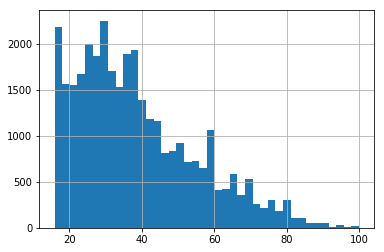

In [13]:
all_data.age_of_respondent.hist(bins=40)

In [0]:
all_data.age_of_respondent = all_data.age_of_respondent**(1/4)

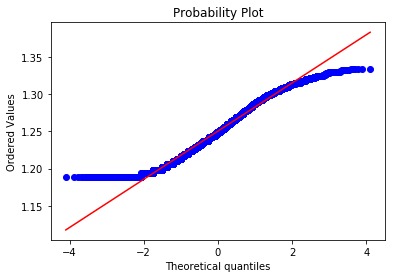

In [43]:
stats.probplot((all_data.age_of_respondent**(1/4)), dist="norm", plot=pylab)
pylab.show()

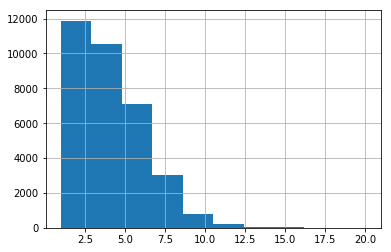

In [44]:
all_data.household_size.hist()

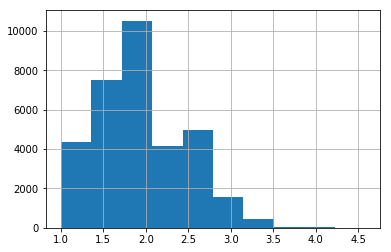

In [20]:
(all_data.household_size**(1/2)).hist()

In [47]:
all_data.household_size.value_counts().sort_values()

18       1
20       2
16       3
14      11
15      16
13      31
11      94
12      96
10     276
9      510
8     1072
7     1980
6     2973
5     4135
1     4377
4     4966
3     5558
2     7501
Name: household_size, dtype: int64

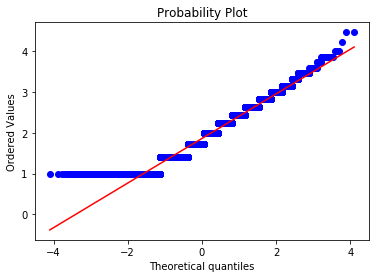

In [53]:
stats.probplot((all_data.household_size**(1/2)), dist="norm", plot=pylab)
pylab.show()

In [0]:
all_data.household_size = all_data.household_size**(1/2)

In [0]:
year_mapping = {2016:0, 2017:1, 2018:2}

all_data['year'] = all_data['year'].map(year_mapping)

In [58]:
one_hot_cols = all_data.columns.tolist()
one_hot_cols.remove('household_size')
one_hot_cols.remove('year')
one_hot_cols.remove('age_of_respondent')

one_hot_cols

['cellphone_access',
 'country',
 'education_level',
 'gender_of_respondent',
 'job_type',
 'location_type',
 'marital_status',
 'relationship_with_head']

In [59]:
df = pd.get_dummies(all_data, columns=one_hot_cols)
df.head()

,age_of_respondent,household_size,year,cellphone_access_No,cellphone_access_Yes,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,gender_of_respondent_Female,gender_of_respondent_Male,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,location_type_Rural,location_type_Urban,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse
0,2.213364,1.732051,2,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1
1,2.892508,2.236068,2,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
2,2.258101,2.236068,2,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0
3,2.414736,2.236068,2,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,2.258101,2.828427,2,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0


In [60]:
all_data.head()

,age_of_respondent,cellphone_access,country,education_level,gender_of_respondent,household_size,job_type,location_type,marital_status,relationship_with_head,year
0,2.213364,Yes,Kenya,Secondary education,Female,1.732051,Self employed,Rural,Married/Living together,Spouse,2
1,2.892508,No,Kenya,No formal education,Female,2.236068,Government Dependent,Rural,Widowed,Head of Household,2
2,2.258101,Yes,Kenya,Vocational/Specialised training,Male,2.236068,Self employed,Urban,Single/Never Married,Other relative,2
3,2.414736,Yes,Kenya,Primary education,Female,2.236068,Formally employed Private,Rural,Married/Living together,Head of Household,2
4,2.258101,No,Kenya,Primary education,Male,2.828427,Informally employed,Urban,Single/Never Married,Child,2


In [0]:
train = df[:ntrain]
test = df[ntrain:]

In [0]:
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits = 10, shuffle = True, random_state  =0)

In [0]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier


In [0]:
classifiers = [
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

In [0]:
for clf in classifiers:
    
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    
    scoring = 'accuracy'

    score = cross_val_score(clf, train, y_train, cv = k_fold, n_jobs = 1, scoring = scoring)
    print(score)
    
    print(1 - (np.mean(score)))
    
    
    
print("="*30)

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
params =  {'n_estimators':[10, 25, 50, 100], 'max_samples':[1, 3, 5, 10]}
bag = BaggingClassifier(random_state = 0)
clf = GridSearchCV(bag, param_grid = params, scoring = 'accuracy', cv = 5, n_jobs = -1)

clf.fit(train, y_train)
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

bag_best = BaggingClassifier(max_samples = 5, n_estimators = 25, random_state = 0)

Best score: 0.8595424391903385
Best parameters: {'max_samples': 10, 'n_estimators': 25}


In [73]:

params = {'n_estimators':[50, 100, 150, 200], 'learning_rate':[0.1,0.3,0.5,0.7,1]}
grad = GradientBoostingClassifier(random_state = 0)

clf = GridSearchCV(grad, param_grid = params, scoring = 'accuracy', cv = 5, n_jobs = -1)

clf.fit(train, y_train)
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))


Best score: 0.8295203265861542
Best parameters: {'learning_rate': 0.1, 'n_estimators': 50}


In [0]:
grad_model = classifiers[5]
grad_model.fit(train, y_train)
pred = grad_model.predict(test)

In [0]:
sub = pd.DataFrame()
sub['uniqueid'] = submission['uniqueid']
sub['bank_account'] = pred
sub.to_csv('NEWsubmission.csv',index=False)
from google.colab import files
files.download("NEWsubmission.csv")